# VizNet Replication Dataset Quality Assessment

Jupyter Notebook profiling the 12,000 datasets used in the VizNet in terms of three measures of data quality:
+ 1) *Free-of-error*: Parseability and visualizability
+ 2) *Completeness*: Percent of columns with missing values (Codd's column integrity)
+ 3) *Interpretability*: Legible column headers and group value names

In [1]:
import os
import numpy as np
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

List Number of Files

In [2]:
data_directory = 'data'
number_of_datasets = len([ x for x in os.listdir(data_directory) if x.endswith('.json')])
print('Number of data files: {}'.format(number_of_datasets))

Number of data files: 12000


# 1) Free of Error

### Parseability

In [3]:
count = 0
datasets = []
for data_filename in os.listdir(data_directory):
    if not data_filename.endswith('.json'): continue
    count += 1
    df = pd.read_json(
        os.path.join(data_directory, data_filename),
        orient='records'
    )
    datasets.append(df)
print('Number of parsed datasets: {}'.format(count))

Number of parsed datasets: 12000


### Visualizability

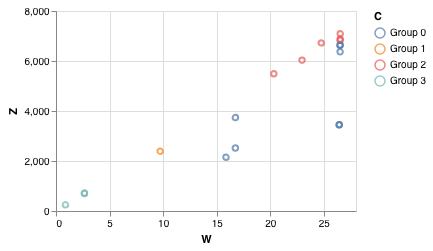

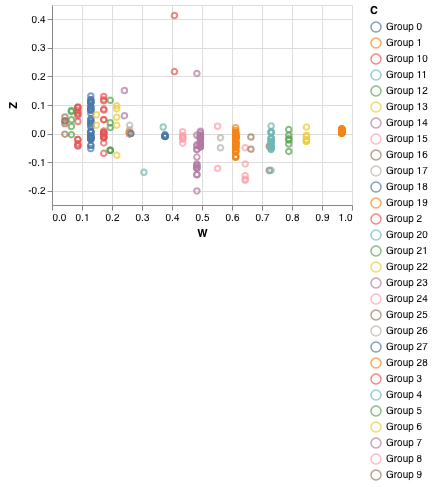

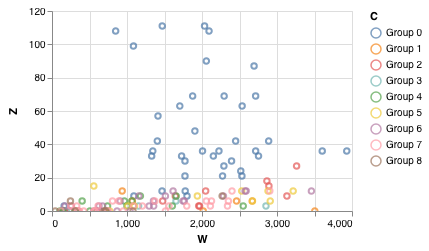

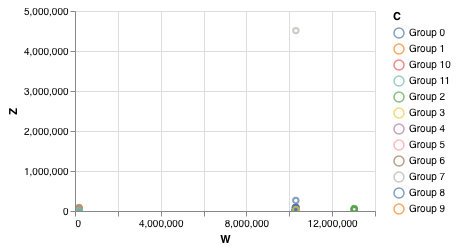

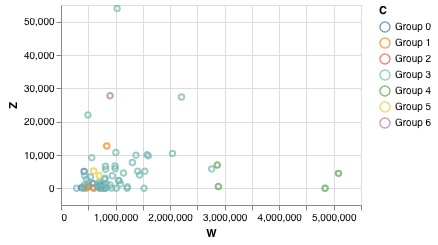

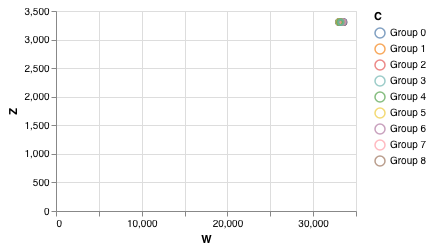

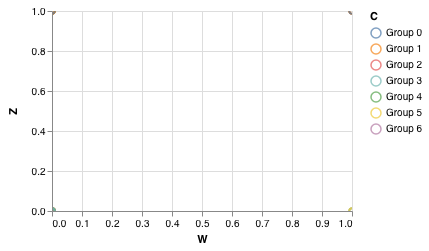

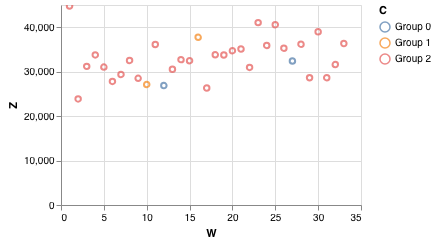

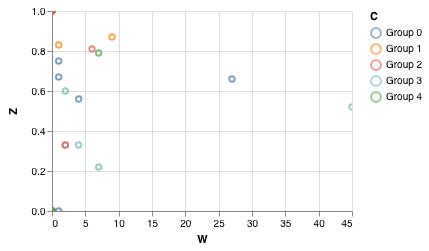

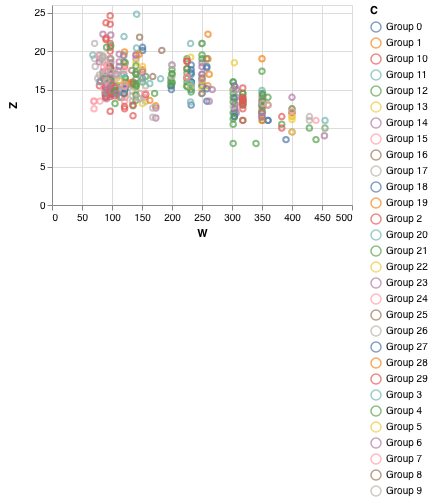

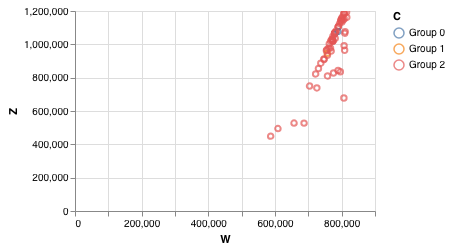

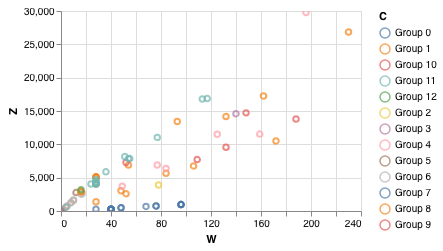

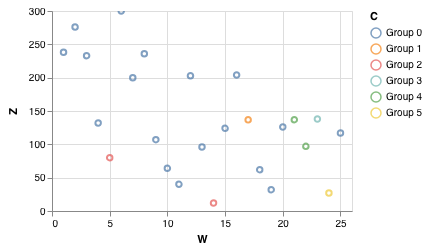

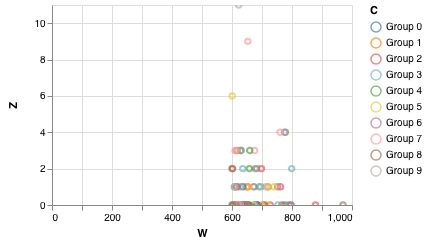

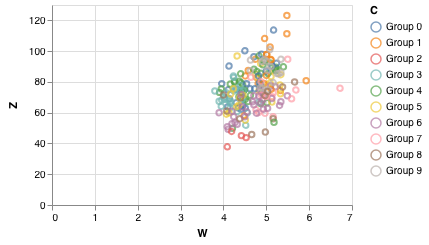

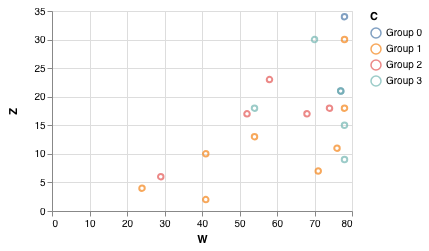

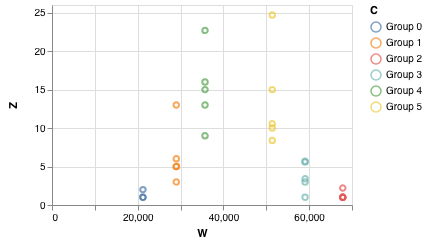

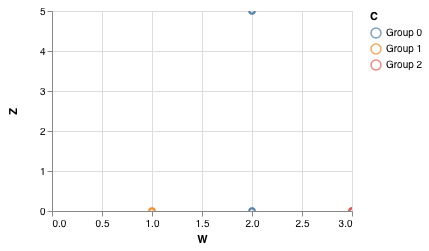

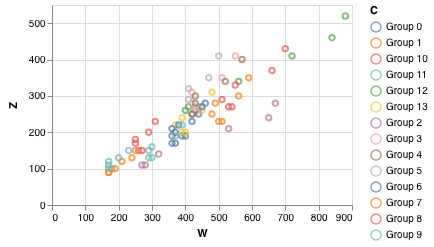

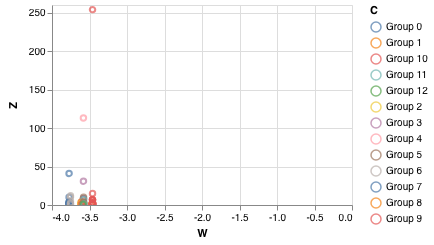

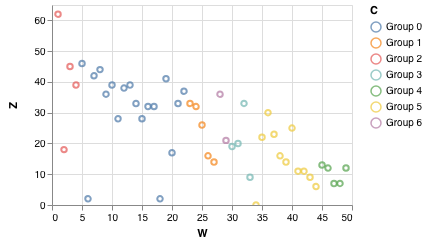

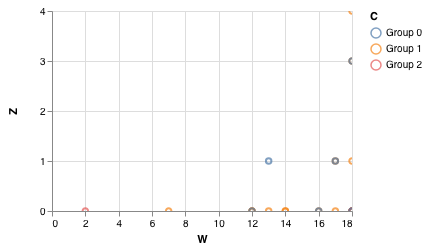

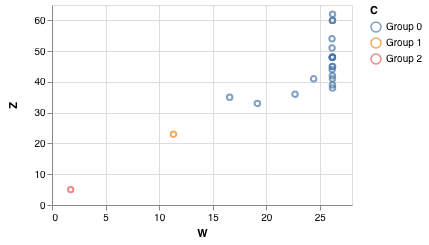

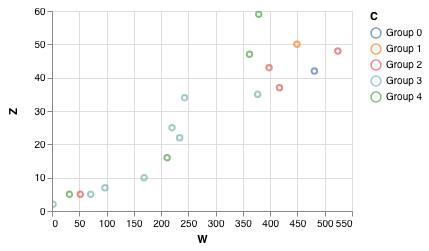

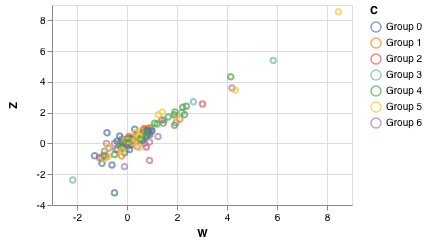

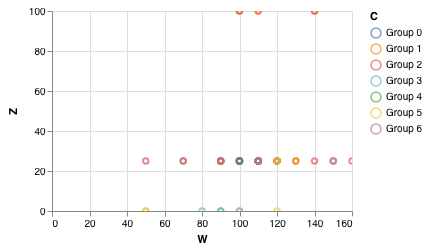

Number of visualization errors: 0 / 12000


In [4]:
visualization_errors = 0
number_of_charts_to_plot = 25

for i, df in enumerate(datasets):
    try:
        chart = alt.Chart(
            df,
            width=300,
            height=200
        ).mark_point().encode(
            x='W',
            y='Z',
            color='C'
        ).interactive()

        if i <= number_of_charts_to_plot:
            chart.display()

    except Exception as e:
        visualization_errors += 1

print('Number of visualization errors: {} / {}'.format(visualization_errors, number_of_datasets))

## 2) Completeness

In [5]:
nan_values_per_column = []
num_datasets_with_incomplete_values = 0
for df in datasets:
    nan_values = df.isna().sum().values
    if any(nan_values):
        num_datasets_with_incomplete_values += 1
    nan_values_per_column.extend(nan_values)

mean_nan_values_per_column = np.mean(nan_values_per_column)
print('Mean number of missing values per column: {} / {}'.format(mean_nan_values_per_column, number_of_datasets))

Mean number of missing values per column: 0.0 / 12000


## 3) Interpretability

In [6]:
all_column_names = []
all_group_value_names = []
for df in datasets:
    all_column_names.extend(df.columns.values)
    all_group_value_names.extend(np.unique(df['C']))

unique_column_names = np.unique(all_column_names)
unique_group_value_names = np.unique(all_group_value_names)

print('Column names: {}'.format(unique_column_names))
print('Group value names: {}'.format(unique_group_value_names))

Column names: ['C' 'W' 'Z']
Group value names: ['Group 0' 'Group 1' 'Group 10' 'Group 11' 'Group 12' 'Group 13'
 'Group 14' 'Group 15' 'Group 16' 'Group 17' 'Group 18' 'Group 19'
 'Group 2' 'Group 20' 'Group 21' 'Group 22' 'Group 23' 'Group 24'
 'Group 25' 'Group 26' 'Group 27' 'Group 28' 'Group 29' 'Group 3'
 'Group 4' 'Group 5' 'Group 6' 'Group 7' 'Group 8' 'Group 9']
